In [1]:
#Analisis de recursos
!pip install memory-profiler
!pip install psutil
#Analisis de datos
!pip install pandas
!pip install matplotlib
!pip install networkx

ERROR: Could not find file C:\Users\JC\AppData\Local\Temp\ipykernel_8980\4123323769.py
order_id             0
user_id              0
order_number         0
order_dow            0
order_hour_of_day    0
product_id           0
add_to_cart_order    0
product_name         0
department_id        0
department           0
dtype: int64
Banana                                       472565
Bag of Organic Bananas                       379450
Organic Strawberries                         264683
Organic Baby Spinach                         241921
Organic Hass Avocado                         213584
                                              ...  
Cajun Sides Dirty Rice                            1
Orangemint Flavored Water                         1
Florentine Spinach and Cheese Pasta Sauce         1
Bite Size Caramel Chocolates                      1
Dynostix Rawhide Chew With Meat                   1
Name: product_name, Length: 49677, dtype: int64
banana                                        4725

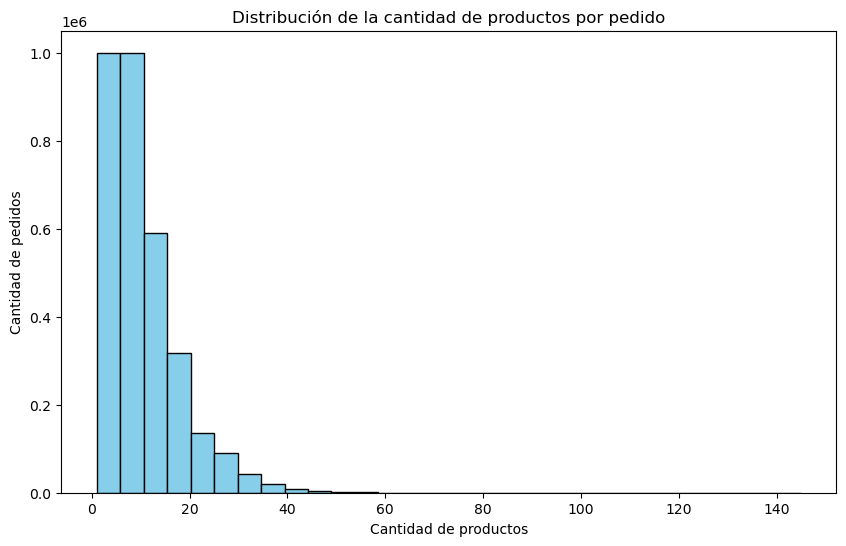

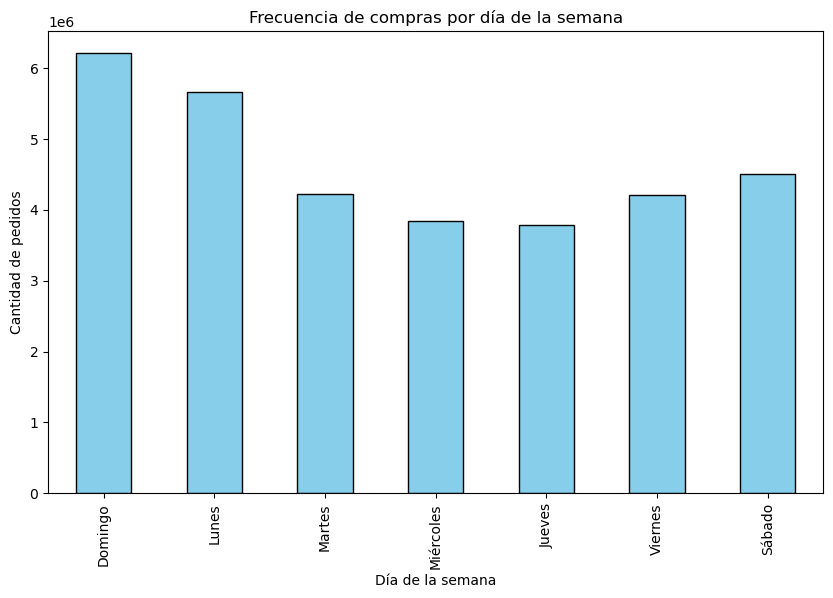

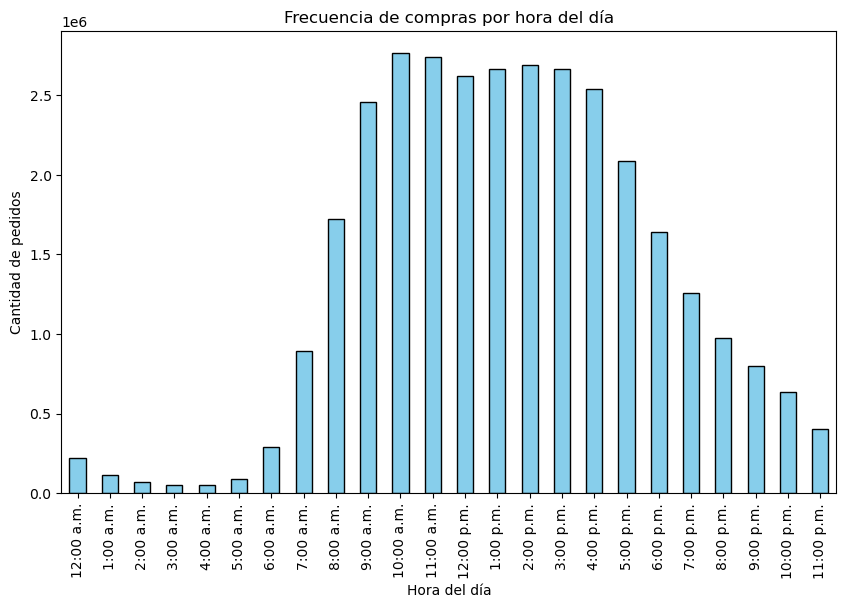

Tiempo de ejecución: 112.25678944587708 segundos
Uso de CPU: 26.8%
Uso de memoria: 40.4%


In [2]:
#Analisis de recursos
import time
import psutil
from memory_profiler import profile

#Importar módulos
#Modulo para procesamiento de datos
import pandas as pd
#Modulo para visualizacion de datos
import matplotlib.pyplot as plt
#Modulo para visualizar los resultados utilizando un gráfico de red
import networkx as nx
from itertools import combinations
from collections import Counter

# Cargar la extensión memory_profiler
%load_ext memory_profiler
start_time = time.time()

#Variables de recursos
@profile

def profiler():
    #Carga de datos de los archivos *.csv
    df_department = pd.read_csv('data/departments.csv')
    df_orders = pd.read_csv('data/orders.csv')
    df_products = pd.read_csv('data/products.csv')
    df_order_products = pd.read_csv('data/order_products__prior.csv')
    
    #Eliminar atributos
    df_orders = df_orders.drop('eval_set', axis=1)
    df_orders = df_orders.drop('days_since_prior_order', axis=1)
    df_products = df_products.drop('aisle_id', axis=1)
    df_order_products = df_order_products.drop('reordered', axis=1)
    
    #Unir los datos
    data = df_orders.merge(df_order_products, on="order_id").merge(df_products, on="product_id").merge(df_department, on="department_id")
    #Imputar valores faltantes y limpiar los nombres de los productos.
    #Verificar si hay valores nulos o faltantes
    valor_imputar = data.isnull().sum()
    print(valor_imputar)
    
    #Verificar si hay nombres de productos duplicados o mal escritos
    valor_duplicados = data['product_name'].value_counts()
    print(valor_duplicados)
    
    #Se van a eliminar los espacios en blanco despues del nombre del producto
    #Se van a convertir a minusculas el nombre del producto
    # Corregir nombres de productos (si es necesario)
    data['product_name'] = data['product_name'].str.strip()  # Eliminar espacios extra
    data['product_name'] = data['product_name'].str.lower()  # Convertir a minúsculas
    
    # Verificar si hay nombres de productos duplicados o mal escritos
    valor_duplicados = data['product_name'].value_counts()
    print(valor_duplicados)
    # Número de productos por pedido
    prod_x_orden = data.groupby('order_id')['product_id'].count()
    
    #Gráfico de la cantidad de productos por pedido
    plt.figure(figsize=(10,6))
    plt.hist(prod_x_orden, bins=30, edgecolor='black', color='skyblue')
    plt.title('Distribución de la cantidad de productos por pedido')
    plt.xlabel('Cantidad de productos')
    plt.ylabel('Cantidad de pedidos')
    plt.show()
    
    dow_dict = {
        0: 'Domingo',
        1: 'Lunes',
        2: 'Martes',
        3: 'Miércoles',
        4: 'Jueves',
        5: 'Viernes',
        6: 'Sábado'
    }
    #Usar el método map para reemplazar los números por los nombres de los días
    data['order_dow'] = data['order_dow'].map(dow_dict)
    #Gráfico de pedidos por día de la semana
    #Gráfico de pedidos por día de la semana
    orden_x_dia = data['order_dow'].value_counts().loc[dow_dict.values()]
    orden_x_dia.plot.bar(figsize=(10,6), edgecolor='black', color='skyblue')
    plt.title('Frecuencia de compras por día de la semana')
    plt.xlabel('Día de la semana')
    plt.ylabel('Cantidad de pedidos')
    plt.show()
    # Pedidos por hora del día
    dow_dict = {
        0: '12:00 a.m.',
        1: '1:00 a.m.',
        2: '2:00 a.m.',
        3: '3:00 a.m.',
        4: '4:00 a.m.',
        5: '5:00 a.m.',
        6: '6:00 a.m.',
        7: '7:00 a.m.',
        8: '8:00 a.m.',
        9: '9:00 a.m.',
        10: '10:00 a.m.',
        11: '11:00 a.m.',
        12: '12:00 p.m.',
        13: '1:00 p.m.',
        14: '2:00 p.m.',
        15: '3:00 p.m.',
        16: '4:00 p.m.',
        17: '5:00 p.m.',
        18: '6:00 p.m.',
        19: '7:00 p.m.',
        20: '8:00 p.m.',
        21: '9:00 p.m.',
        22: '10:00 p.m.',
        23: '11:00 p.m.'
    }
    
    # Usar el método map para reemplazar los números por los nombres de los días
    data['order_hour_of_day'] = data['order_hour_of_day'].map(dow_dict)
    orden_x_hora = data['order_hour_of_day'].value_counts().loc[dow_dict.values()]
    
    # Gráfico de pedidos por hora del día
    orden_x_hora.plot.bar(figsize=(10,6), edgecolor='black', color='skyblue')
    plt.title('Frecuencia de compras por hora del día')
    plt.xlabel('Hora del día')
    plt.ylabel('Cantidad de pedidos')
    plt.xticks(range(24))
    plt.show()
    pass

profiler()

end_time = time.time()

print(f"Tiempo de ejecución: {end_time - start_time} segundos")
print(f'Uso de CPU: {psutil.cpu_percent()}%')
print(f'Uso de memoria: {psutil.virtual_memory().percent}%')

In [ ]:
#Obtener la relacion entre numero del producto con nombre del prodcuto
nombre_prod = data[['product_id', 'product_name']]
#Contar la cantidad de cada producto vendido
cant_prod = nombre_prod['product_name'].value_counts()
#Obtener los nombres de los 5 productos más vendidos
top_prod = cant_prod.head(5)

# Gráfico de los productos más vendidos
top_prod.plot(kind='barh', edgecolor='black', color='skyblue')
# Añadir etiquetas y título
plt.xlabel('Número de veces vendido')
plt.ylabel('Nombre del producto')
plt.title('Los 5 productos más vendidos')
plt.gca().invert_yaxis()  
# Invertir el eje y para que el producto más vendido esté en la parte superior
plt.show()

# Producto más vendido por departamento
top_prod_x_dep = data.groupby('department')['product_name'].value_counts().groupby(level=0).nlargest(1)
# Restablecer el primer nivel de índice
top_prod_x_dep = top_prod_x_dep.reset_index(level=0, drop=True)

# Crear el gráfico de barras
plt.figure(figsize=(10,10))
top_prod_x_dep.plot(kind='barh', edgecolor='black', color='skyblue')
# Configurar los ejes y el título
plt.title('Producto más comprado por departamento')
plt.xlabel('Cantidad de pedidos')
plt.ylabel('Departamento / Pedido')
# Invertir el eje y para que el departamento con el producto más vendido esté en la parte superior
plt.gca().invert_yaxis()
plt.show()

#Agrupar los datos por 'order_id' y obtener la lista de productos en cada pedido
orden_prod = data.groupby('order_id')['product_name'].apply(list)

#Generar todas las posibles combinaciones de productos en cada pedido y contar la frecuencia de cada combinación
comb_prod = Counter()

for products in orden_prod:
    comb_prod.update(combinations(products, 2))

# Obtener las 5 combinaciones de productos más comunes
top_comb_prod = comb_prod.most_common(5)

# Creamos un grafo
G = nx.Graph()

# Añadimos nodos (productos) y bordes (conexiones entre productos) al grafo
for (p1, p2), count in top_comb_prod:
    G.add_node(p1)
    G.add_node(p2)
    G.add_edge(p1, p2, weight=count)

# Dibujamos el grafo
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Los 5 productos más comprados juntos')
plt.show()
